#### Decision Tree using inbuilt sklearn

In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5) 

In [3]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

In [8]:
data = pd.read_csv("titanic.csv")
columns_to_drop = ["PassengerId","Name","Ticket","Cabin","Embarked"]
data_clean = data.drop(columns_to_drop,axis=1)
le = LabelEncoder()
data_clean["Sex"] = le.fit_transform(data_clean["Sex"])

In [9]:
input_cols = ['Pclass',"Sex","Age","SibSp","Parch","Fare"]
output_cols = ["Survived"]

X = data_clean[input_cols]
Y = data_clean[output_cols]

In [11]:
split = int(0.7*data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop=True)

In [12]:
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [13]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1])

In [14]:
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.8171641791044776

#### Graph Representation of Tree

In [18]:
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

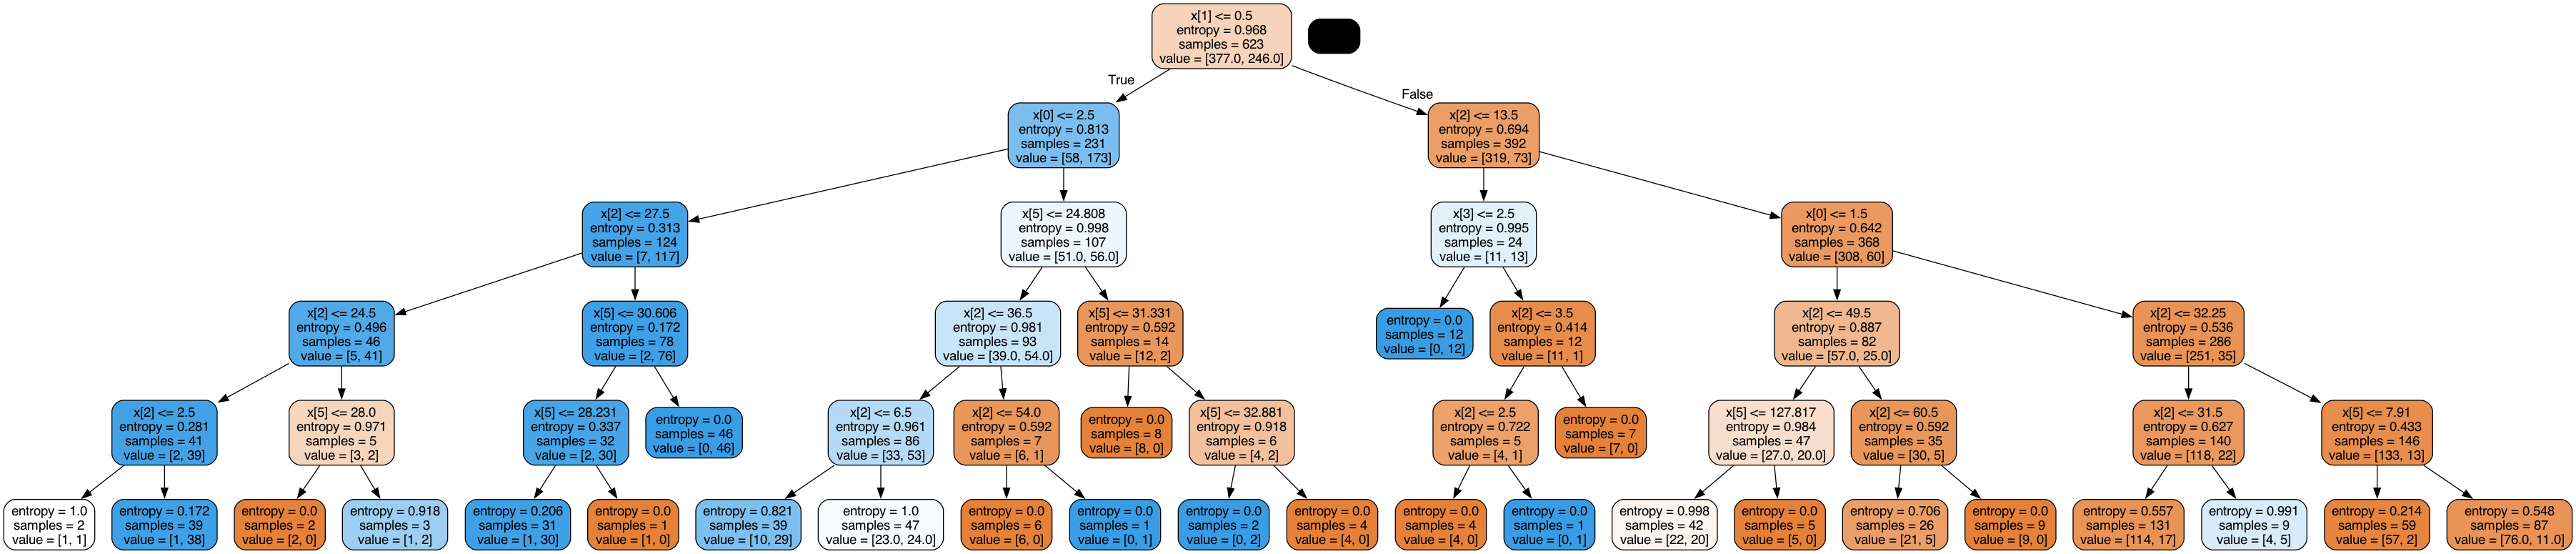

In [20]:
dot_data = StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [21]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,))

In [22]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.8539325842696629

In [23]:
sk_tree.score(X_test,Y_test)

0.8097014925373134

#### Random Forests

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)

In [26]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [27]:
rf.score(X_train,Y_train)

0.8459069020866774

In [28]:
rf.score(X_test,Y_test)

0.832089552238806

In [29]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(RandomForestClassifier(n_estimators=40,max_depth=5,criterion='entropy'),X_train,Y_train,cv=5).mean()

In [30]:
print(acc)
acc_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5),X_train,Y_train,cv=5).mean()
    acc_list.append(acc)

0.8201677419354839


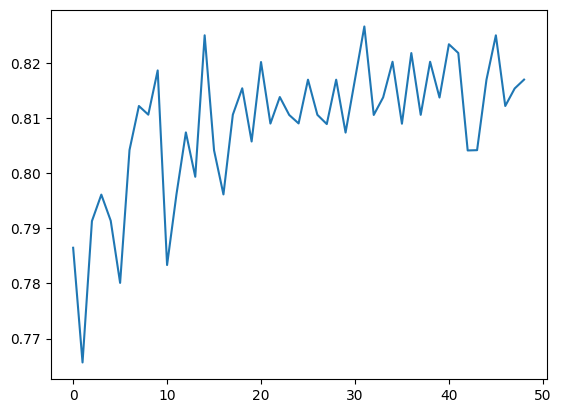

In [31]:
import matplotlib.pyplot as plt
plt.plot(acc_list)
plt.show()

In [32]:
print(np.argmax(acc_list))

31


In [33]:
rf = RandomForestClassifier(n_estimators=32,max_depth=5,criterion='entropy')
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=32)

In [35]:
print(rf.score(X_train,Y_train))
print(rf.score(X_test,Y_test))

0.8635634028892456
0.835820895522388
